<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Merging-Education-CSV-and-Geometry-Data" data-toc-modified-id="Merging-Education-CSV-and-Geometry-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Merging Education CSV and Geometry Data</a></span></li><li><span><a href="#Interpreting-Education-CSV-Data" data-toc-modified-id="Interpreting-Education-CSV-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interpreting Education CSV Data</a></span></li><li><span><a href="#Joining-Education-and-Municipality-Data" data-toc-modified-id="Joining-Education-and-Municipality-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Joining Education and Municipality Data</a></span></li><li><span><a href="#Aggregating-Education-Data" data-toc-modified-id="Aggregating-Education-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aggregating Education Data</a></span></li></ul></div>

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Data locations

def dataF(x):
    return '/home/lucia/bu/year4/semester2/EE509/project/ee509-project/data/' + x

### Merging Education CSV and Geometry Data

In [14]:
ed = pd.read_csv(dataF('educationBlockGroupCSV/ed.csv'))
ed_shp = gpd.read_file(dataF('educationBlockGroupSHP/US_blck_grp_2019.shp'))

In [76]:
ed_join = ed_shp.merge(ed, on='GISJOIN')

<AxesSubplot:>

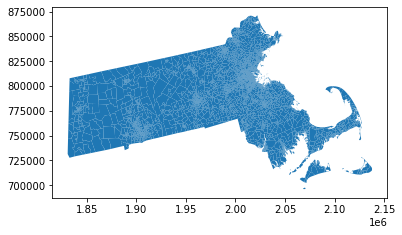

In [77]:
ed_join.plot()

In [80]:
ed_join = ed_join.to_crs('EPSG:26986')
ed_join.crs

<Derived Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Interpreting Education CSV Data

In [84]:
ed_join['ALWGE002']

0        9
1        0
2        0
3       17
4        0
        ..
4973    29
4974     0
4975     0
4976     0
4977    12
Name: ALWGE002, Length: 4978, dtype: int64

In [83]:
# TODO: test this function

def edMatch(data):
    
    data_c = data.copy()
    
    cats = {
        'ALWGE002': 0,   # 'no schooling completed'
        'ALWGE003': 2,   # 'nursery school'
        'ALWGE004': 4,   # 'kindergarten'
        'ALWGE005': 5,   # '1st grade'
        'ALWGE006': 6,   # '2nd grade'
        'ALWGE007': 7,   # '3rd grade'
        'ALWGE008': 8,   # '4th grade'
        'ALWGE009': 9,   # '5th grade'
        'ALWGE010': 10,  # '6th grade'
        'ALWGE011': 11,  # '7th grade'
        'ALWGE012': 12,  # '8th grade'
        'ALWGE013': 13,  # '9th grade'
        'ALWGE014': 14,  # '10th grade'
        'ALWGE015': 15,  # '11th grade'
        'ALWGE016': 15,  # '12th grade, no diploma'
        'ALWGE017': 16,  # 'Regular high school diploma'
        'ALWGE018': 16,  # 'GED or alternative credential' (equivalent to high school diploma)
        'ALWGE019': 16,  # 'Some college, less than 1 year'
        'ALWGE020': 18,  # 'Some college, 1 or more years, no degree'
        'ALWGE021': 19,  # 'Associate's degree' (2 years of college)
        'ALWGE022': 20,  # 'Bachelor's degree' (4 years of college)
        'ALWGE023': 22,  # 'Master's degree' (4 years of college, +2 years)
        'ALWGE024': 23,  # 'Professional school degree' (1-5 years)
        'ALWGE025': 25,  # 'Doctorate degree' (4 years of college, +5 years)
    }
    
    sumEd = Series(index=data_c.index)
    avgEd = Series(index=data_c.index)
    
    for row in data_c:
        subtotal = 0
        
        for c in cats.keys():
            subtotal += (data_c.loc[row, c]*cats  # TODO: sum over the # years completed (dictionary) instead?
    
        sumEd.iloc[row] = subtotal
        avgEd.iloc[row] = subtotal / data_c.loc[row, 'ALWGE001']
        
    data_c['sumEd'] = sumEd
    data_c['avgEd'] = avgEd
    
    return data_c

### Joining Education and Municipality Data

In [45]:
municip_shp = gpd.read_file(dataF('MAmunicipalities/TOWNSSURVEY_POLYM.shp'))

<AxesSubplot:>

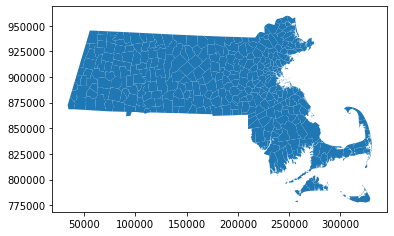

In [52]:
municip_shp.plot()

<AxesSubplot:>

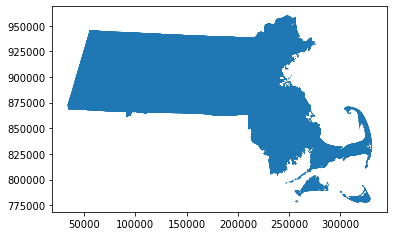

In [62]:
ed_municip_shp2 = gpd.sjoin(municip_shp, ed_shp.to_crs('EPSG:26986'), how='left')

ed_municip_shp2.plot()

### Aggregating Education Data